In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import bokeh
import matplotlib as mpl
from matplotlib import rcParams, rc
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

import numpy as np
import math
from scipy.interpolate import griddata

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches

from scipy.io import readsav

In [4]:
plt.style.use('../../Paul_style.txt')
plt.rcParams["font.family"] = "Serif"

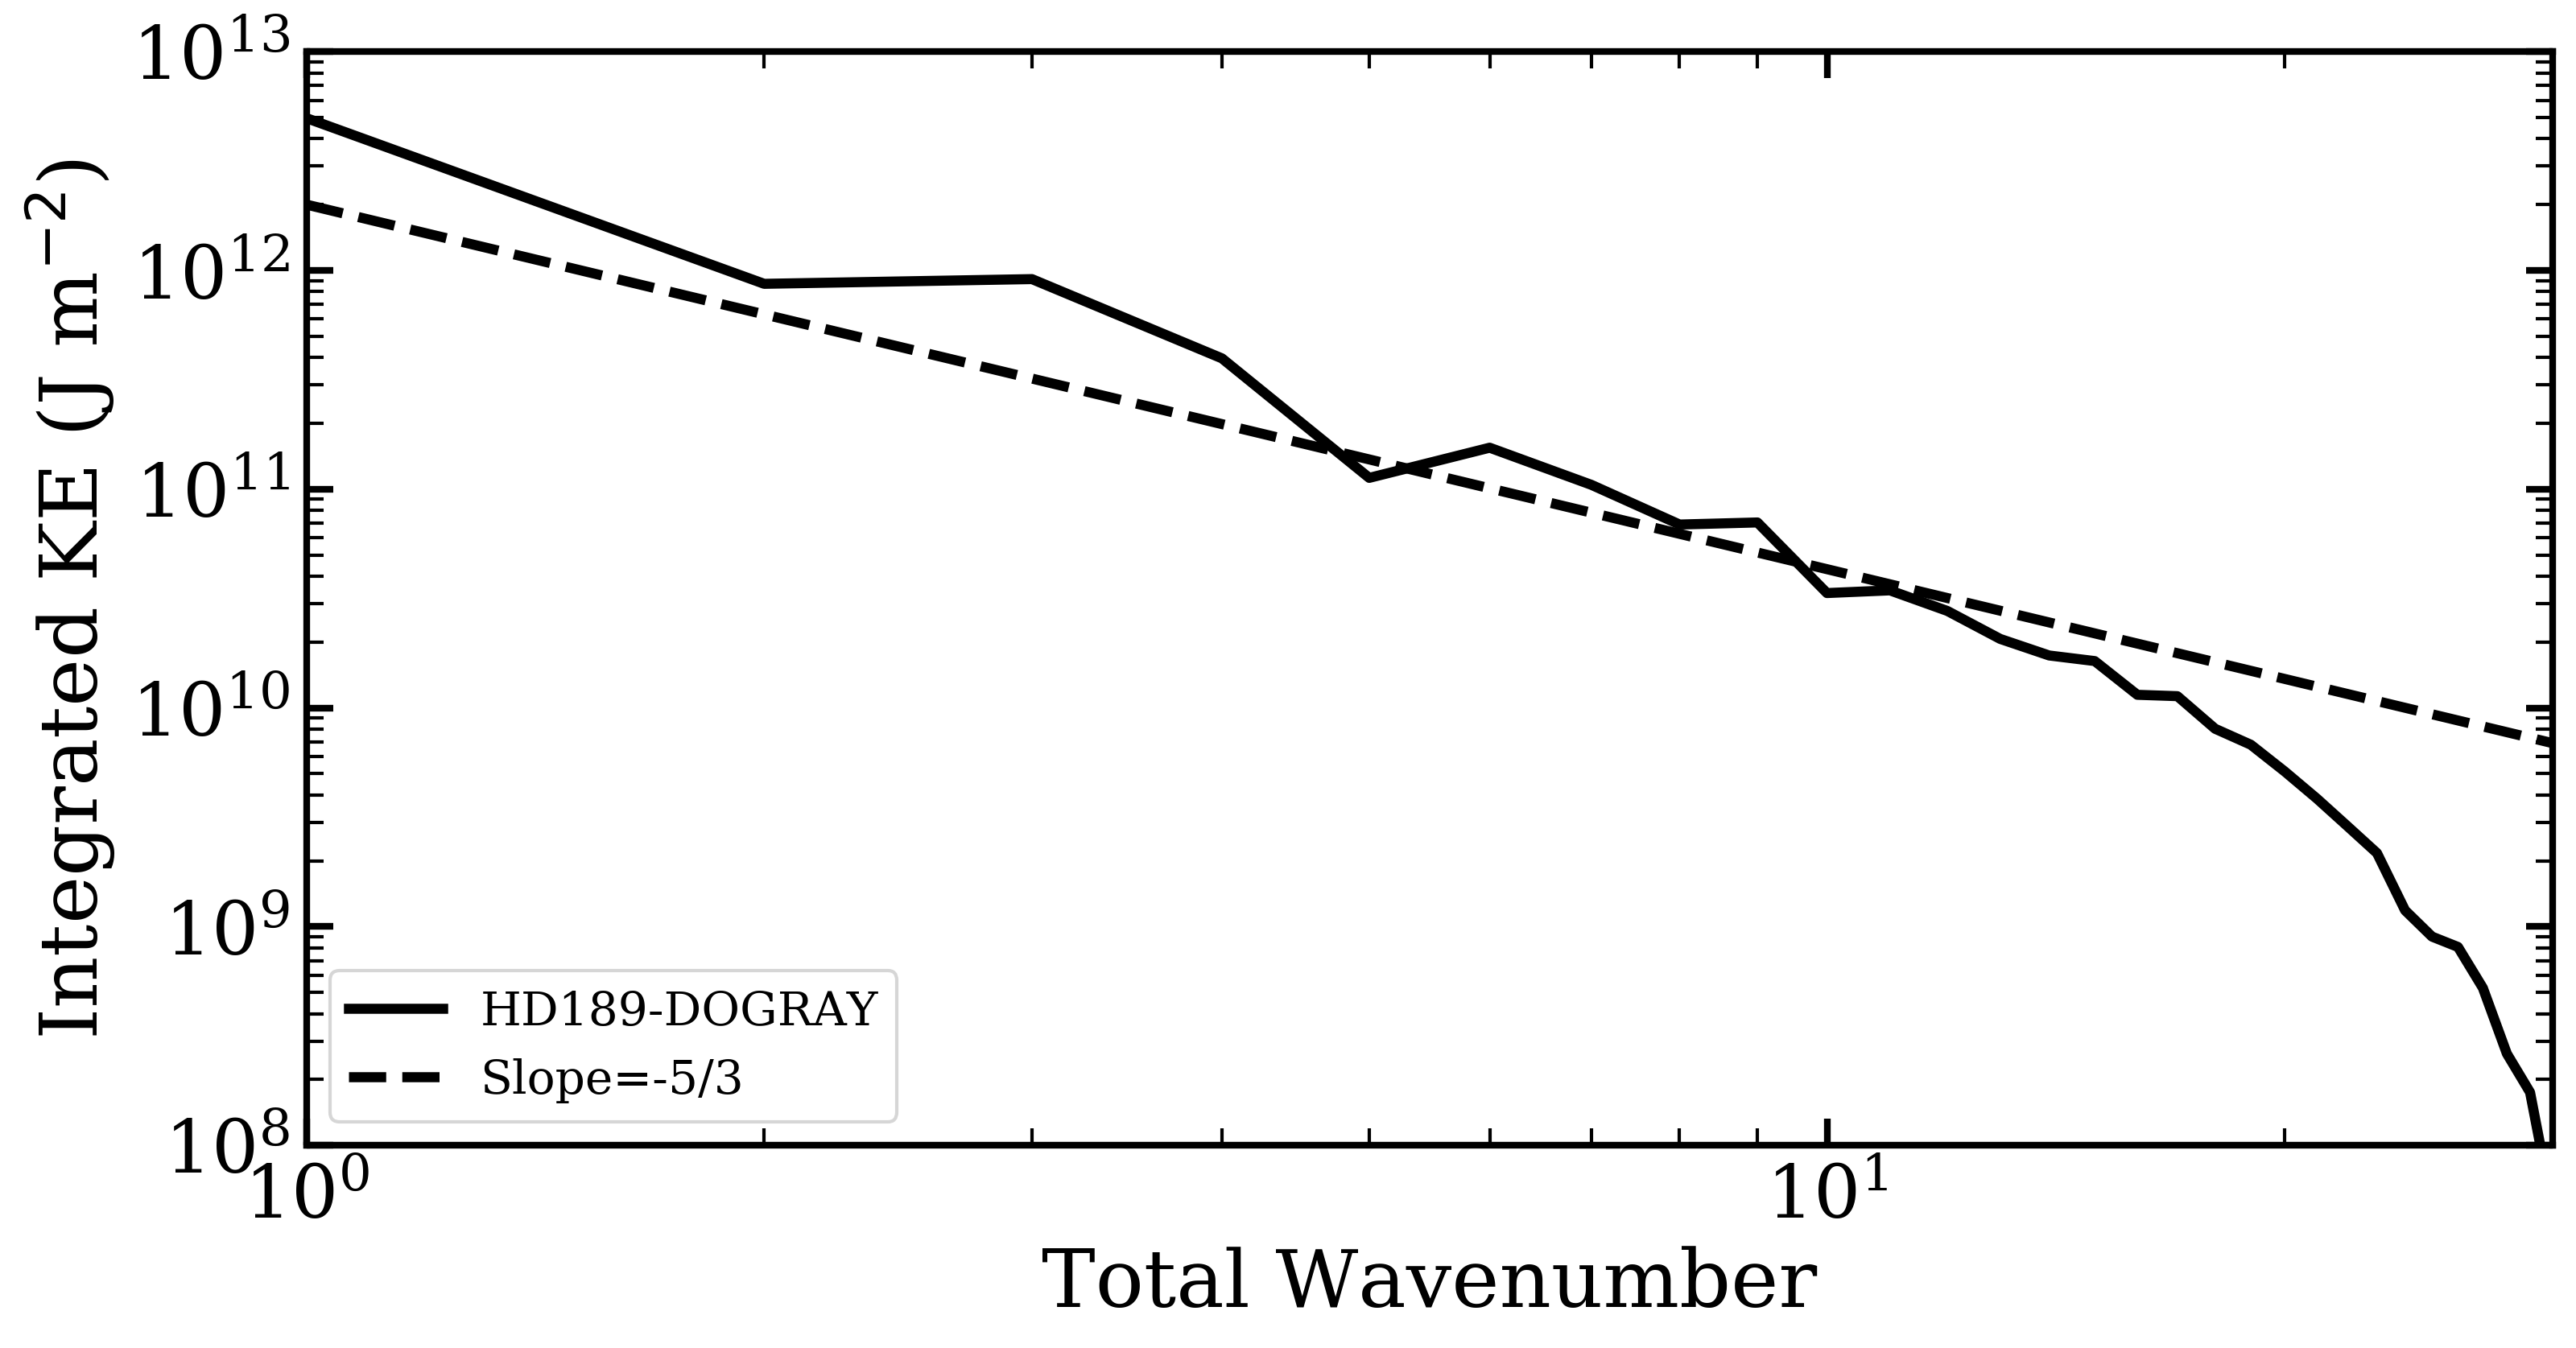

In [9]:
# Figure aesthetics
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6),sharex=True, sharey=True,squeeze=True)
plt.subplots_adjust(hspace=0.1, wspace=0.05) 

cases = ['../Spectral-Processing/GCM-OUTPUT/HD189-DOGRAY']


colors = ['black', 'red']

z = 0
for case in cases:
    #with open('../Spectra-Processing/GCM-OUTPUT/' + case + '/Isaac-Tests/fort.29') as f:
    #with open('/home/imalsky/Desktop/' + case + '/Isaac-Tests/fort.29') as f:
    with open(case+'/Planet_Run/'+'fort.29','r') as f:

        lines = f.readlines()

    profiles = []
    for j in range(1, len(lines) - 5, 5):
        sub_profile = []
        for i in range(j, j+5):
            if (i%5 == 1):
                sub_profile.append([float(x) for x in lines[i][5:-1].split(" ")[1:]])
            else:
                sub_profile.append([float(x) for x in lines[i][0:-1].split(" ")[1:]])
        one_profile = [item for sublist in sub_profile for item in sublist]
        profiles.append(one_profile)

    profiles = np.asarray(profiles)
    
    total_kes = []
    for i in range(31):
        total_kes.append(sum(profiles[i]))
    total_kes = np.asarray(total_kes)
    
    ax.plot(total_kes, linewidth=3, color=colors[z], label=case[34:])
    z = z + 1

ax.set_xlabel(r"Total Wavenumber", size=24)
ax.set_ylabel(r'Integrated KE (J m$^{-2}$)', size=24)

xs = np.linspace(1, 50, 1000)
ys = xs ** (-5/3)
ax.plot(xs, 2e12*ys, linewidth=3, color='black', label='Slope=-5/3', linestyle='dashed')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='lower left', fontsize=14)
ax.set_ylim(1e8, 1e13)
ax.set_xlim(1,30)

fig.savefig('../Figures/kinetic-energy-spectra.png', bbox_inches='tight', dpi=250)